# **Projeto Python** | Análise de sistema de crédito
Alex Silva de Assunção<br> 

## 1\. Problema proposto

Análise de uma estrutura de dados de sistema de crédito, verificando a relação de clientes adimplentes e inadimplentes a partir de caracteristicas de cada cliente e histórico de relacionamento.

## 2\. Bibliotecas a serem utilizadas

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('whitegrid')



## 3\. Dados de crédito para análise

In [ ]:
base_dados = df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')


## 4\. Verificação dos dados

Função para calculo de porcentagem

In [3]:
def porcentagem(valor,total):
    return round(100*valor/total,2)

Verificando a quantidade totais de clientes na base, assim como os clientes adimplentes e inadimplentes

In [4]:
clientes_total, _ = base_dados.shape
clientes_adimplentes_total, _ = base_dados[base_dados['default'] == 0].shape
clientes_inadimplentes_total, _ = base_dados[base_dados['default'] == 1].shape

print(f'Total de clientes na base: {clientes_total}\nTotal de clientes Adimplentes: {clientes_adimplentes_total}, que corresponde a {porcentagem(clientes_adimplentes_total,clientes_total)}%\nTotal de clientes Inadimplestes: {clientes_inadimplentes_total}, que corresponde a {porcentagem(clientes_inadimplentes_total,clientes_total)}%')

Total de clientes na base: 10127
Total de clientes Adimplentes: 8500, que corresponde a 83.93%
Total de clientes Inadimplestes: 1627, que corresponde a 16.07%


Verificando quais colunas possuem dados em branco

In [5]:
base_dados.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Verificando a porcentagem de itens nulos de cada coluna identificada

In [6]:
def metrica_dados_nulos(base_dados: pd.DataFrame) -> None:
    metrica_dados_nulos = []
    for coluna in base_dados.columns:
        if(base_dados[coluna].isna().any()):
            quantidade, _ = base_dados[base_dados[coluna].isna()].shape
            total, _ = base_dados.shape
            descricao_dados_faltantes = f'Coluna "{coluna}"=> quantidade: {quantidade}, porcentagem: {porcentagem(quantidade,total)}%'
            metrica_dados_nulos.append(descricao_dados_faltantes)
    
    for status in metrica_dados_nulos:
        print(status)

In [7]:
print('Clientes com dados NULOS na totalidade')
metrica_dados_nulos(base_dados)
print('\nClientes com dados NULOS Adimplentes')
metrica_dados_nulos(base_dados[base_dados['default'] == 0])
print('\nClientes com dados NULOS Inadimplentes')
metrica_dados_nulos(base_dados[base_dados['default'] == 1])

Clientes com dados NULOS na totalidade
Coluna "escolaridade"=> quantidade: 1519, porcentagem: 15.0%
Coluna "estado_civil"=> quantidade: 749, porcentagem: 7.4%
Coluna "salario_anual"=> quantidade: 1112, porcentagem: 10.98%

Clientes com dados NULOS Adimplentes
Coluna "escolaridade"=> quantidade: 1263, porcentagem: 14.86%
Coluna "estado_civil"=> quantidade: 620, porcentagem: 7.29%
Coluna "salario_anual"=> quantidade: 925, porcentagem: 10.88%

Clientes com dados NULOS Inadimplentes
Coluna "escolaridade"=> quantidade: 256, porcentagem: 15.73%
Coluna "estado_civil"=> quantidade: 129, porcentagem: 7.93%
Coluna "salario_anual"=> quantidade: 187, porcentagem: 11.49%


Verificando os tipos de dados de cada coluna, se são do tipo "int", "object", "float" ou "boolean"

In [8]:
base_dados.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

## 5\. Limpeza e extratificação dos dados

Para correta análise dos dados das colunas "limite_credito" e "Valor_transacoes_12m" é necessário converter as variáveis do tipo object para uma variável numérica.

In [9]:
fn = lambda valor: float(valor.replace(".","").replace(",","."))

base_dados['limite_credito'] = base_dados['limite_credito'].apply(fn)
base_dados['valor_transacoes_12m'] = base_dados['valor_transacoes_12m'].apply(fn)

In [10]:
base_dados.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Nessa etapa iremos remover os dados nulos da base, como identificado na verificação dos dados, as métricas dos itens nulos são aproximadas, onde sua eliminação não irá gerar um desvio que invalide os resultados posteriores.

In [11]:
base_dados.dropna(inplace=True)

In [12]:
clientes_total_novo, _ = base_dados.shape
clientes_adimplentes_total_novo, _ = base_dados[base_dados['default'] == 0].shape
clientes_inadimplentes_total_novo, _ = base_dados[base_dados['default'] == 1].shape

print(f'Total de clientes na base: {clientes_total}\nTotal de clientes Adimplentes: {clientes_adimplentes_total}, que corresponde a {porcentagem(clientes_adimplentes_total,clientes_total)}%\nTotal de clientes Inadimplestes: {clientes_inadimplentes_total}, que corresponde a {porcentagem(clientes_inadimplentes_total,clientes_total)}%')

print('\nApós limpeza de campos nulos\n')

print(f'Total de clientes na base: {clientes_total_novo}\nTotal de clientes Adimplentes: {clientes_adimplentes_total_novo}, que corresponde a {porcentagem(clientes_adimplentes_total_novo,clientes_total_novo)}%\nTotal de clientes Inadimplestes: {clientes_inadimplentes_total_novo}, que corresponde a {porcentagem(clientes_inadimplentes_total_novo,clientes_total_novo)}%')

Total de clientes na base: 10127
Total de clientes Adimplentes: 8500, que corresponde a 83.93%
Total de clientes Inadimplestes: 1627, que corresponde a 16.07%

Após limpeza de campos nulos

Total de clientes na base: 7081
Total de clientes Adimplentes: 5968, que corresponde a 84.28%
Total de clientes Inadimplestes: 1113, que corresponde a 15.72%


## 6\. Análise dos dados

Visualização da relação "admimplentes" e "inadimplentes" com os dados apresentados.

In [13]:
base_adimplentes = base_dados[base_dados['default'] == 0]
base_inadimplestes = base_dados[base_dados['default'] == 1]

Dados com atributos categóricos

In [14]:
base_dados.select_dtypes('object').dtypes

sexo             object
escolaridade     object
estado_civil     object
salario_anual    object
tipo_cartao      object
dtype: object

Função para exibição das métricas de cada atributo categórico

In [15]:
def exibir_grafico_coluna(coluna,base_dados):
    

    titulos = [coluna+' dos Clientes',coluna+' dos Clientes Adimplentes',coluna+' dos Clientes Inadimplentes']

    eixo = 0
    max_y = 0
    max = base_dados.select_dtypes('object').describe()[coluna]['freq']*1.1

    figura, eixos = plt.subplots(1,3,figsize=(20,5),sharex=True)
    

    for dataframe in[base_dados, base_adimplentes, base_inadimplestes]:

        base_to_plot = dataframe[coluna].value_counts().reset_index()
        base_to_plot.columns = [coluna, 'frequencia_absoluta']
        base_to_plot.sort_values(by=[coluna], inplace=True)

        f = sns.barplot(x=coluna, y='frequencia_absoluta', data=base_to_plot, ax=eixos[eixo])

        f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequencia Absoluta')

        f.set_xticklabels(labels=base_to_plot[coluna], rotation=90)

        _, max_y_f = f.get_ylim()

        max_y = max_y_f if max_y_f > max_y else max_y

        f.set(ylim = (0,max_y))

        eixo +=1

    figura.show()
    
    

Separando os dados de acordo com a LGPD para análise

In [16]:
base_dados_objetos = base_dados.drop('sexo',axis=1).select_dtypes(include='object')

Exibindo os gráficos para análise de acordo com os atributos categóricos dos clientes, dispostos em sequencia

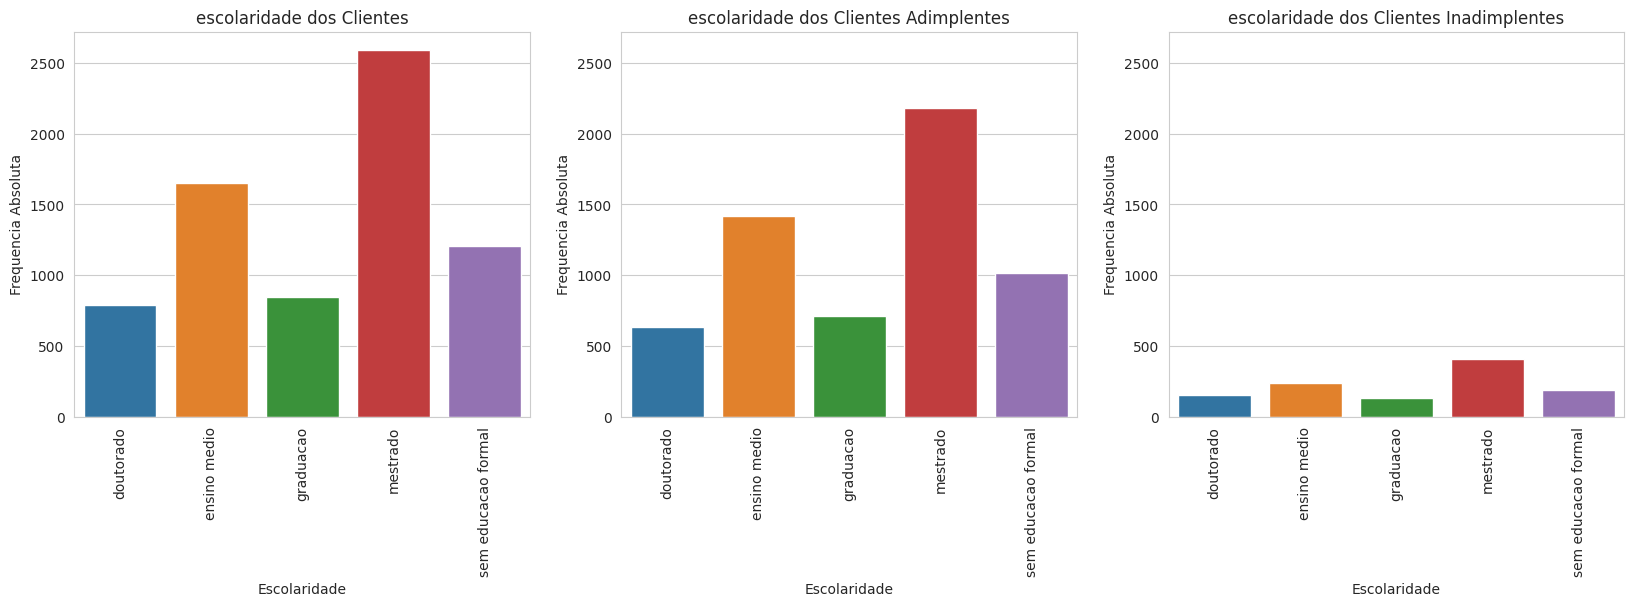

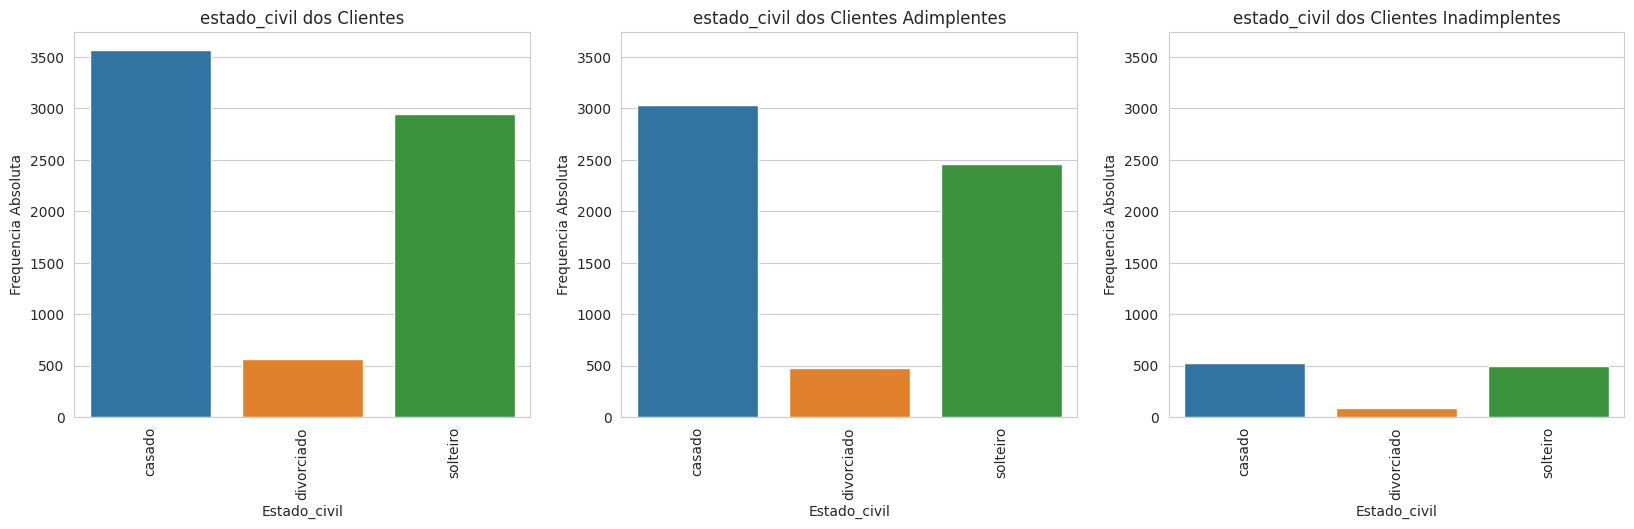

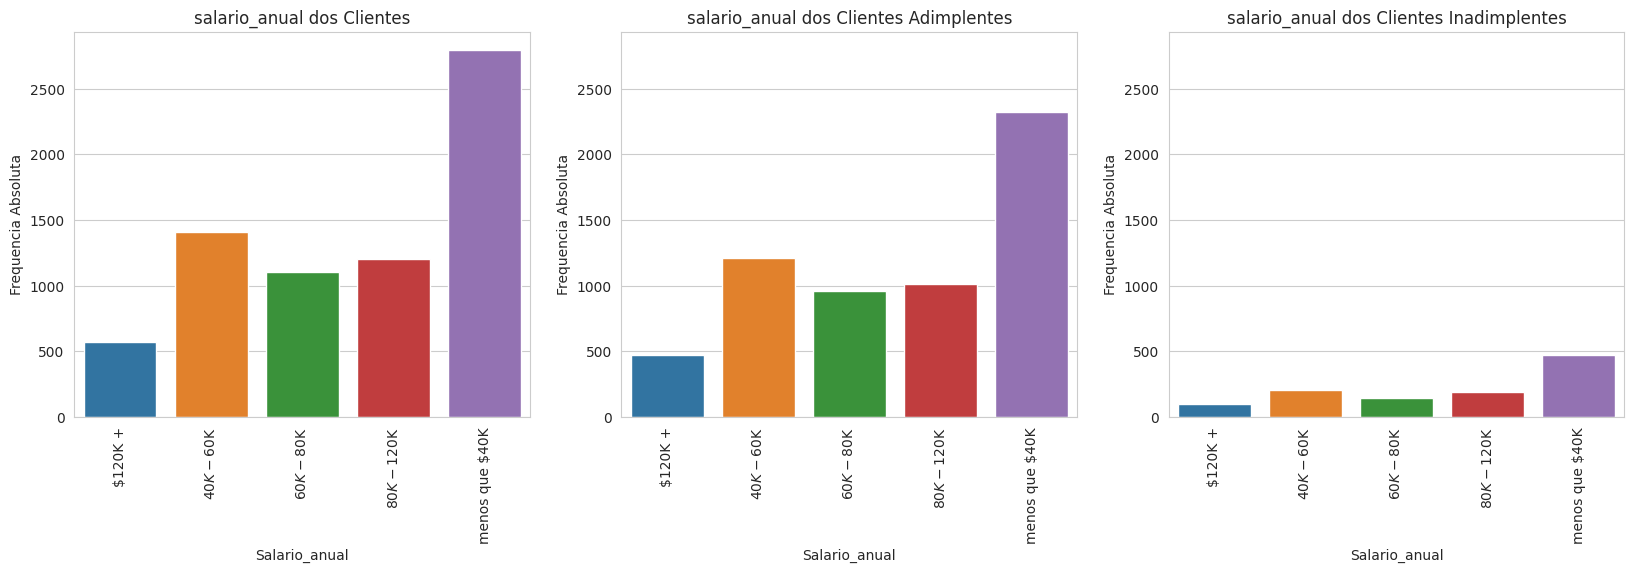

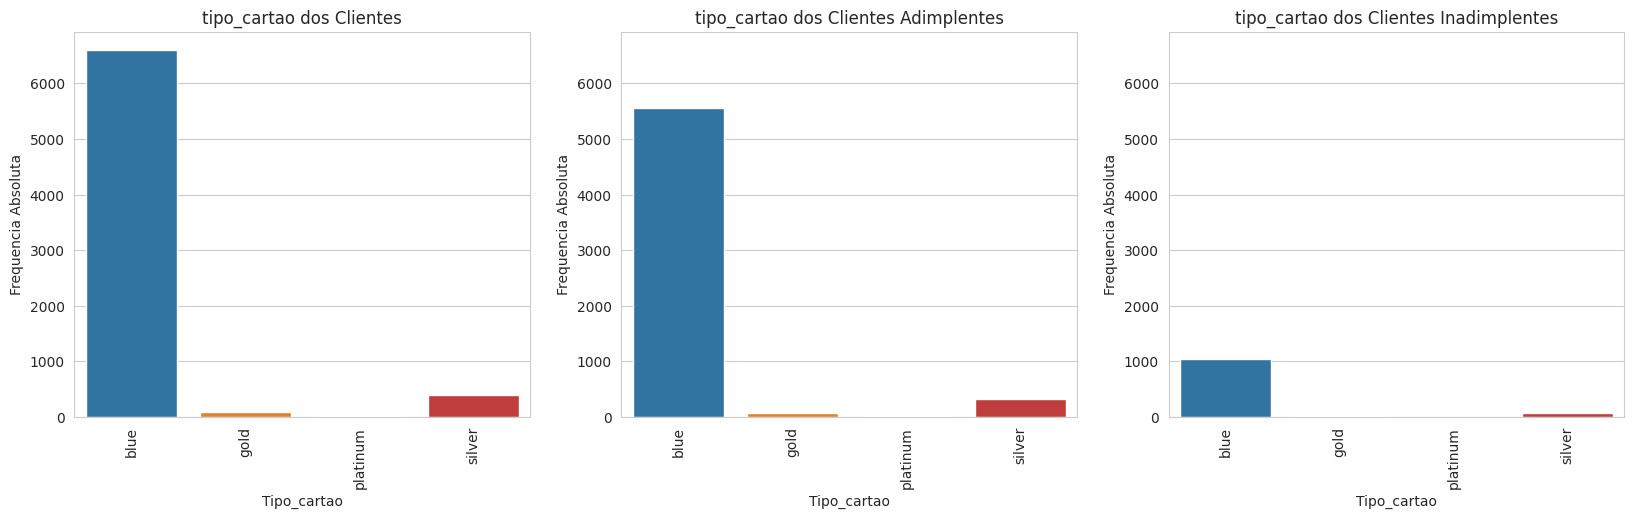

In [17]:
for base in base_dados_objetos:
    exibir_grafico_coluna(base,base_dados)

**Com os resultados obtidos a partir de atributos categóricos não foi possível identificar correlação entre os dados analisados e os clientes adimplentes e inadimplentes**

Analise dos dados com atributos numéricos

In [18]:
base_dados.select_dtypes('number').dtypes

id                           int64
default                      int64
idade                        int64
dependentes                  int64
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [19]:
base_dados_number = base_dados.drop('id',axis=1).select_dtypes('number')

Função para exibição das métricas de cada atributo numérico

In [20]:
def exibir_grafico_coluna_number(coluna, base_dados):
    titulos = [coluna+' dos Clientes',coluna+' dos Clientes Adimplentes',coluna+' dos Clientes Inadimplentes']
    base_adimplentes = base_dados[base_dados['default']==0]
    base_inadimplestes = base_dados[base_dados['default']==1]

    
    eixo = 0
    max_y = 0

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [base_dados,base_adimplentes,base_inadimplestes]:
        f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1
    figura.show()

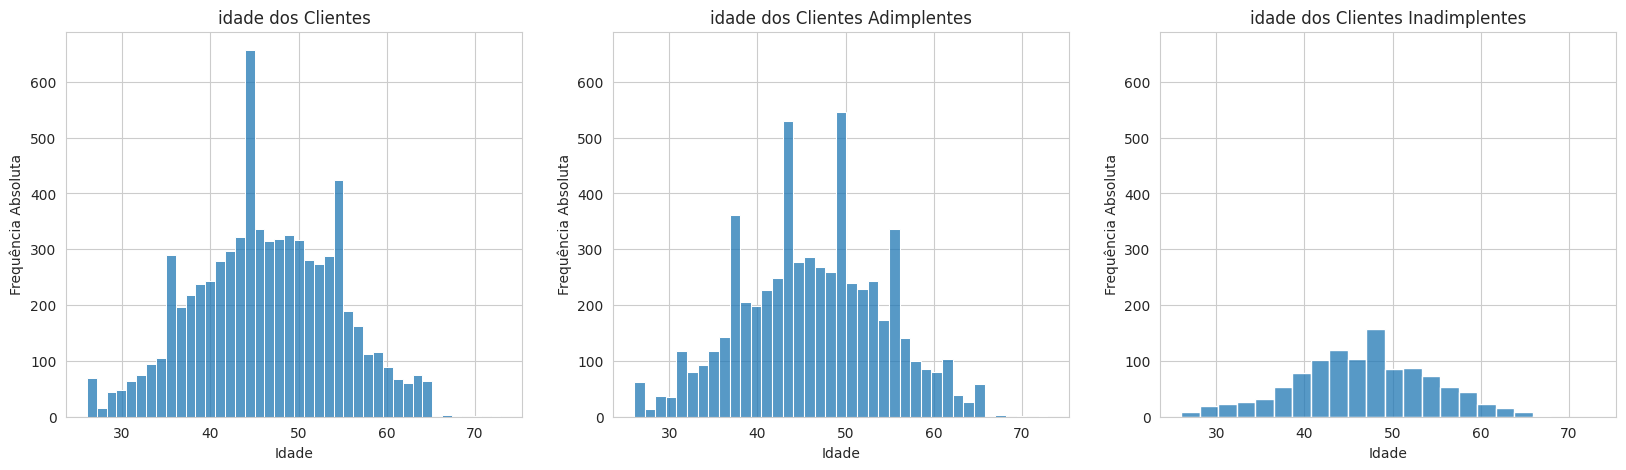

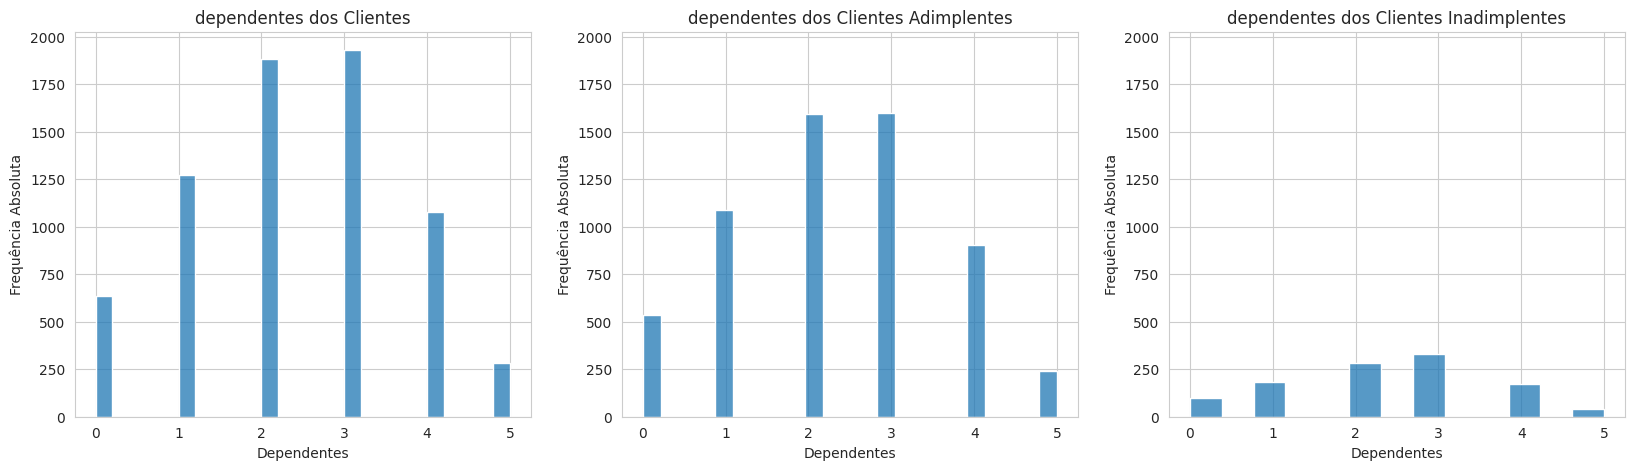

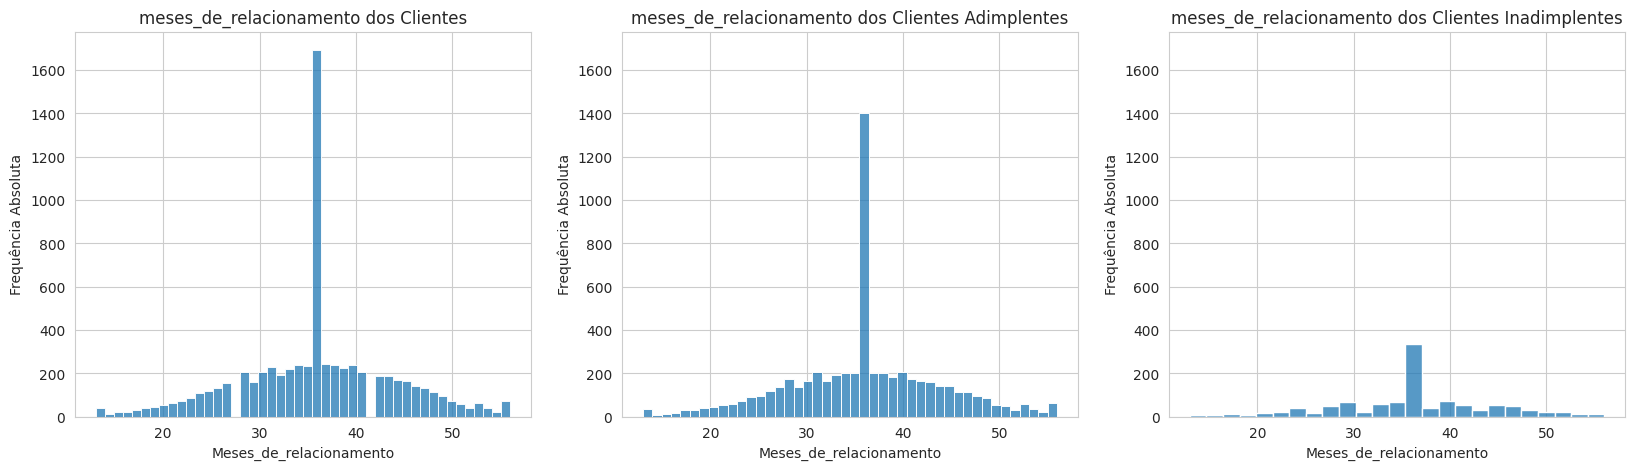

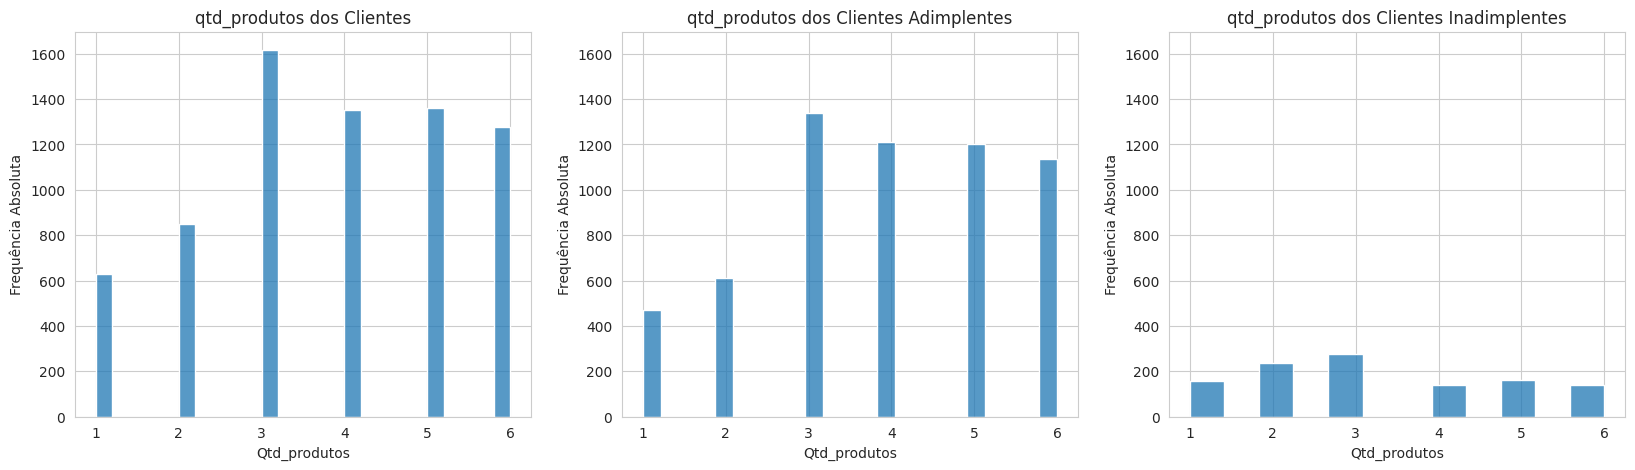

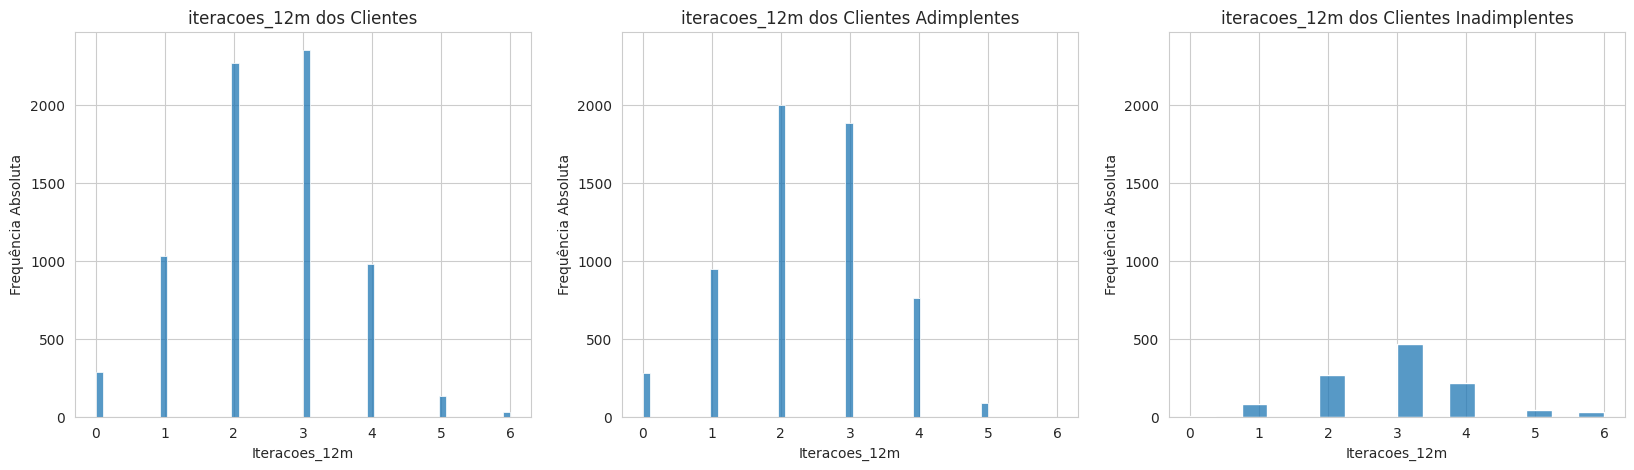

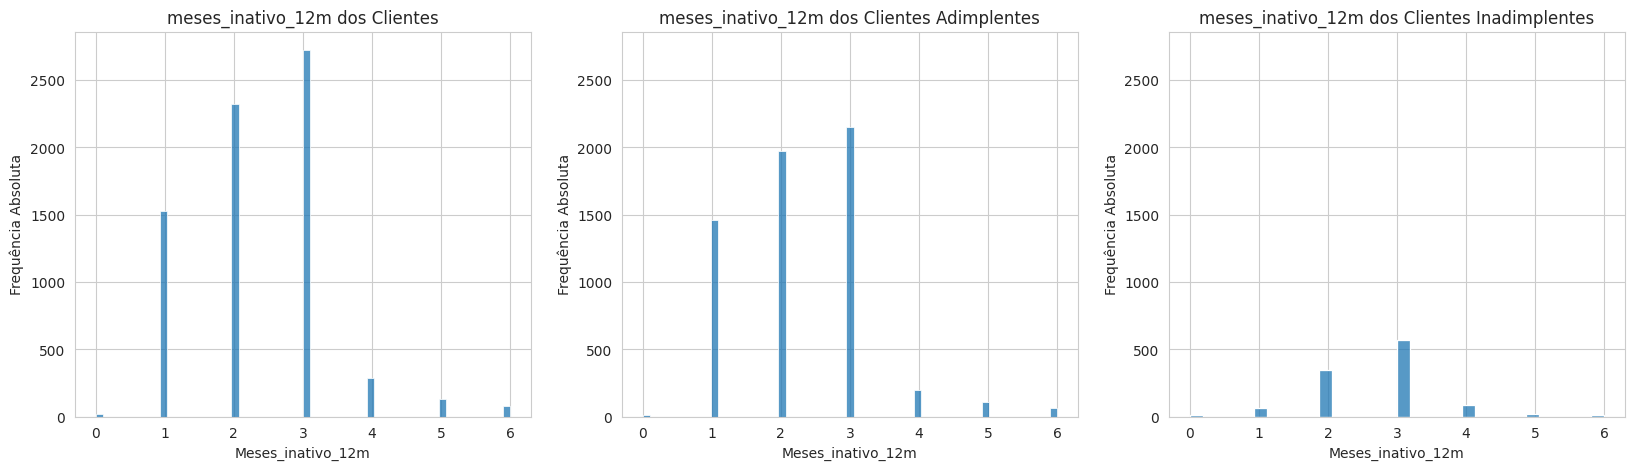

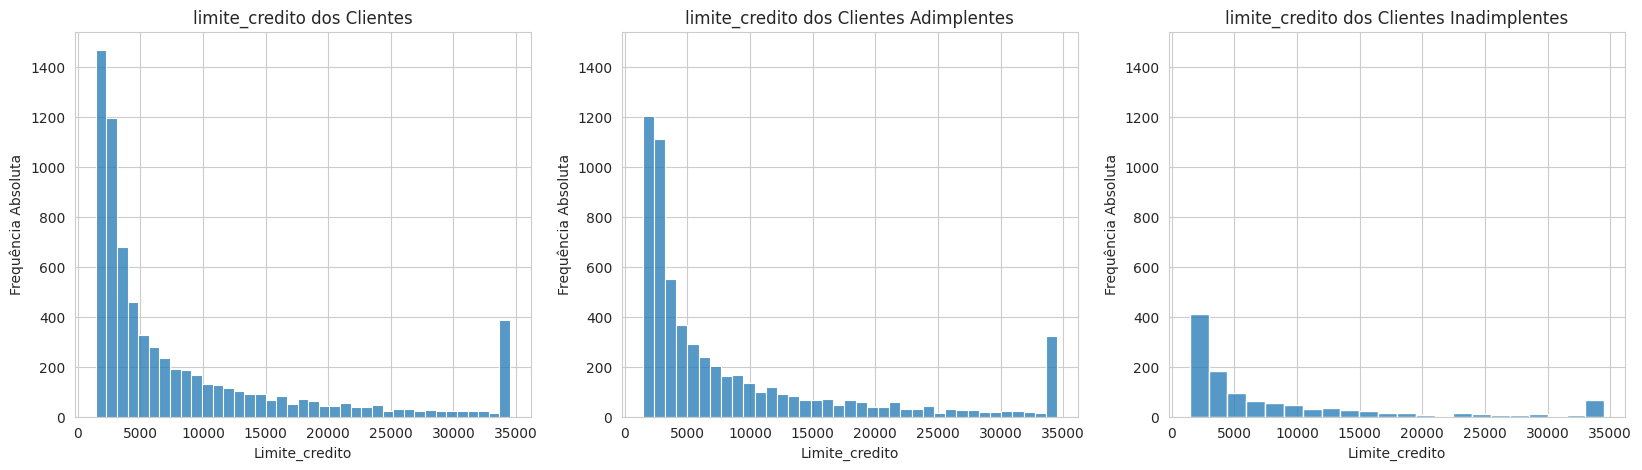

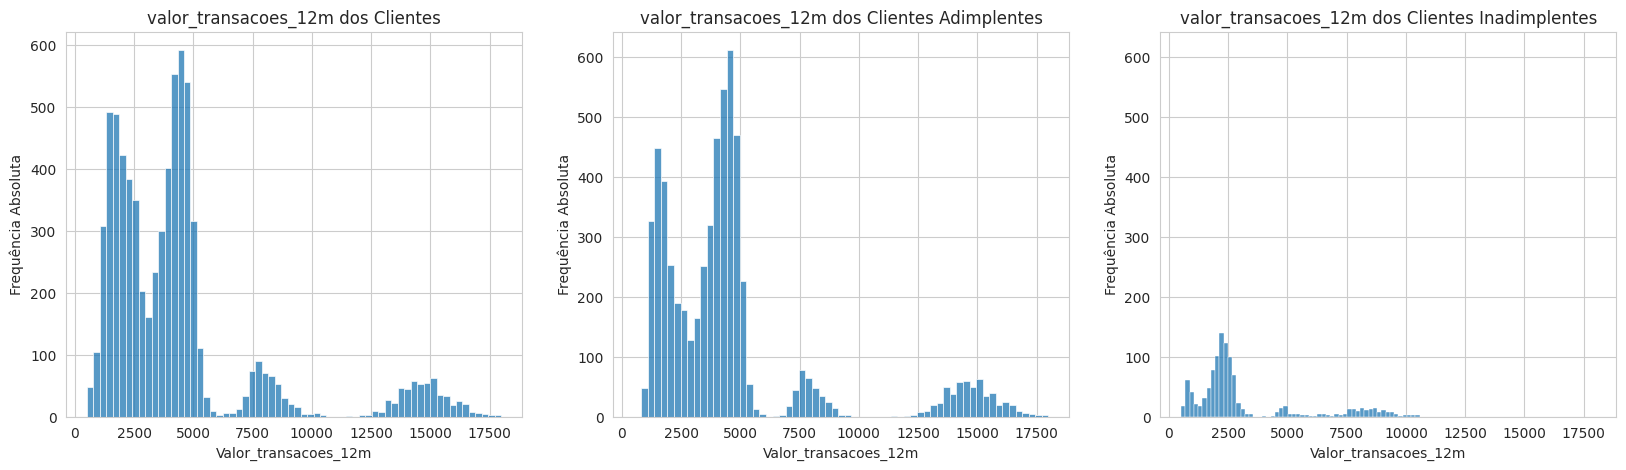

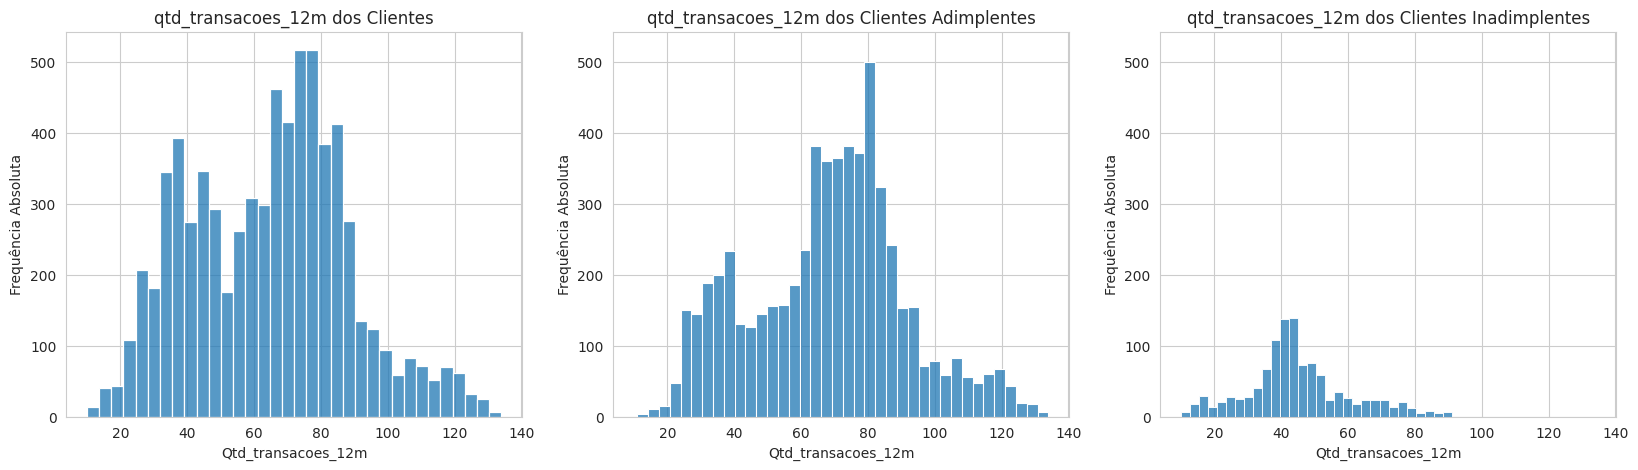

In [21]:
for base in base_dados_number:
    if base != 'default':
        exibir_grafico_coluna_number(base,base_dados)

**Com os resultados obtidos a partir de atributos numéricos, foi possível identificar uma relação dos atributos "valor_transacoes_12m" e "qtd_transacoes_12m" com os cliente que possuim estatus de adimplentes e inadimplentes.
sendo possivel fazer um cruzamento desses resultados obtidos**

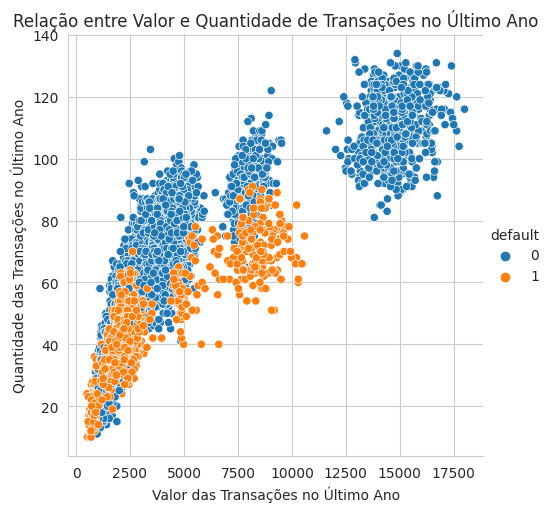

In [22]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=base_dados, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

## 7\. *Insight* a partir dos resultados obtidos

**A partir dos dados disponiveis na base, foi possivel realizadar a verificação, tratamento e análise dos clientes. Com os resultados de atributos numéricos dos clientes foi possivel identificar duas concentrações de clientes inadimplestes:**

    1- Clientes que possuem quantidade de até 60 transações no ano e valor das transações abaixo de 4000
    2- Clientes que possuem quantidade de 40 até 100 transações no ano e valor das transações entre 4000 e até 12000

**Também foi possível identificar que nenhum cliente que possue alto indice de transações no ano juntamente com alto valor nas transações, se enquadram como inadimplente.**